In [11]:
%matplotlib ipympl

# Test notebook

$x = y * 2$

```bash 
mkdir dirp
```

Foo bar.

This is de markdown.

In [1]:
# {{hide}}
import numpy as np
import matplotlib.pyplot as plt

de foo


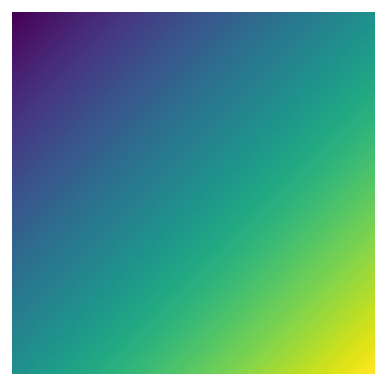

de bar


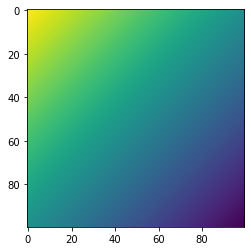

In [2]:
x = np.arange(100).reshape(-1, 1) + np.arange(100)
print("de foo")
plt.figure(dpi=120)
plt.imshow(x)
plt.axis("off")
plt.show()
print("de bar")
plt.imshow(-x)

In [3]:
print(list(range(100)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


{{hide}}

I'd like to be able to hide cells.

{{collapse}}

I'd like to be able to have collapsible cells.

In [4]:
# {{hide}}
print("I'd like to be able to hide code cells, but not the output")

I'd like to be able to hide code cells, but not the output


In [5]:
# {{collapse}}
print("I'd like to be able to have collapsible code cells, with the output showing")

I'd like to be able to have collapsible code cells, with the output showing


In [6]:
# {{collapse_all}}
print("I'd like to be able to collapse code and output.")

I'd like to be able to collapse code and output.


In [7]:
from collections import defaultdict


class Variable:
    def __init__(self, value, local_gradients=()):
        self.value = value
        self.local_gradients = local_gradients


def add(a, b):
    "Create the variable that results from adding two variables."
    value = a.value + b.value
    local_gradients = (
        (a, 1),  # the local derivative with respect to a is 1
        (b, 1),  # the local derivative with respect to b is 1
    )
    return Variable(value, local_gradients)


def mul(a, b):
    "Create the variable that results from multiplying two variables."
    value = a.value * b.value
    local_gradients = (
        (a, b.value),  # the local derivative with respect to a is b.value
        (b, a.value),  # the local derivative with respect to b is a.value
    )
    return Variable(value, local_gradients)


def get_gradients(variable):
    """Compute the first derivatives of `variable`
    with respect to child variables.
    """
    gradients = defaultdict(lambda: 0)

    def compute_gradients(variable, path_value):
        for child_variable, local_gradient in variable.local_gradients:
            # "Multiply the edges of a path":
            value_of_path_to_child = path_value * local_gradient
            # "Add together the different paths":
            gradients[child_variable] += value_of_path_to_child
            # recurse through graph:
            compute_gradients(child_variable, value_of_path_to_child)

    compute_gradients(variable, path_value=1)
    # (path_value=1 is from `variable` differentiated w.r.t. itself)
    return gradients

In [8]:
count = 0
try:
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    for m in range(3):
                        for n in range(3):
                            for o in range(3):
                                if count > 5:
                                    assert False, "finished"
                                count += 1
                                print("u wot m8")
except AssertionError:
    pass

u wot m8
u wot m8
u wot m8
u wot m8
u wot m8
u wot m8


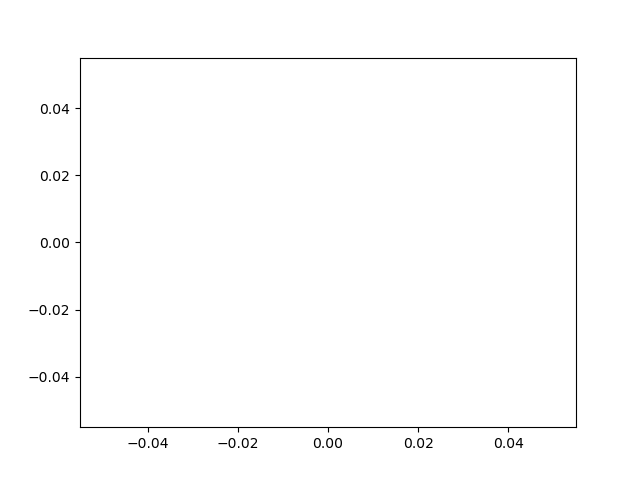

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
(ln,) = plt.plot([], [], "ro")


def init():
    ax.set_xlim(0, 2 * np.pi)
    ax.set_ylim(-1, 1)
    return (ln,)


def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return (ln,)


ani = FuncAnimation(
    fig, update, frames=np.linspace(0, 2 * np.pi, 128), init_func=init, blit=True
)
plt.show()